In [13]:
from ema_workbench.analysis import prim
from ema_workbench import load_results
from sklearn import preprocessing
from problem_formulation import get_model_for_problem_formulation
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
from funs_project import get_cases

In [14]:
ACTOR = "genscen_Gorssel_50000_12-06-2021-03-06-15.tar.gz"

In [63]:
files= {"Gorssel": "simulation/generated/genscen_Gorssel_50000_12-06-2021-03-06-15.tar.gz",
       "Overijssel": "simulation/generated/genscen_Overijssel_50000_12-06-2021-02-18-42.tar.gz",
       "Deventer": "simulation/generated/genscen_Deventer_50000_12-06-2021-02-25-33.tar.gz"}

experiments = {}
outcomes = {}
model = {}
uncertainties = {}
x = {}
for k, v in files.items():
    experiments[k], outcomes[k] = load_results(v)
    model, _ = get_model_for_problem_formulation(k)
    uncertainties[k] = [uncertainty.name for uncertainty in model.uncertainties]
    x[k] = experiments[k][uncertainties[k]]
    outcomes[k] = pd.DataFrame(outcomes[k])
    
# gexperiments, goutcomes = load_results("simulation/generated/genscen_Gorssel_50000_12-06-2021-03-06-15.tar.gz")
# oexperiments, ooutcomes = load_results("simulation/generated/genscen_Overijssel_50000_12-06-2021-02-18-42.tar.gz")
# dexperiments, doutcomes = load_results("simulation/generated/genscen_Deventer_50000_07-06-2021-18-18-21.tar.gz")
# g_model, _ = get_model_for_problem_formulation("Gorssel")
# o_model, _ = get_model_for_problem_formulation("Overijssel")
# d_model, _ = get_model_for_problem_formulation("Deventer")
# ouncertainties = [uncertainty.name for uncertainty in o_model.uncertainties]
# x = experiments[uncertainties]
# outcomes_df = pd.DataFrame(outcomes)

In [25]:
outcomes["Gorssel"].columns.values.tolist()

['Difference in Expected Annual Damage Gorssel-Deventer',
 'Difference in Expected Number of Deaths Gorssel-Deventer',
 'Gorssel Expected Annual Damage',
 'Gorssel Expected Number of Deaths',
 'Gorssel Total Costs']

In [5]:
DAMAGE = outcomes_df.columns[2]
DEATHS = outcomes_df.columns[3]

In [26]:
outcomes["Deventer"].columns.values.tolist()

['Deventer Expected Annual Damage',
 'Deventer Expected Number of Deaths',
 'Deventer Total Costs']

In [27]:
outcomes["Overijssel"].columns.values.tolist()

['Gorssel and Deventer Expected Annual Damage',
 'Gorssel and Deventer Expected Number of Deaths',
 'Gorssel and Deventer Total Costs']

Obviously, without any policies inplace, there also aren't any costs for Gorssel.

In [69]:
prim_algs = {}
percentiles = [20, 90]

def conditional(outcome, q):
    global percentiles
    if q == percentiles[0]:
        return outcome < np.percentile(a=outcome, q=q)
    elif q == percentiles[1]:
        return outcome > np.percentile(a=outcome, q=q)  
    else:
        print("g")
            
for actor in ["Overijssel", "Deventer", "Gorssel"]:
    prim_algs[actor] = {}
    if actor=="Overijssel":
        DAMAGE = "Gorssel and Deventer Expected Annual Damage"
    elif actor=="Deventer":
        DAMAGE = "Deventer Expected Annual Damage"
    elif actor=="Gorssel":
        DAMAGE = "Gorssel Expected Annual Damage"
    print(actor, DAMAGE)
    
    for q in percentiles:
        prim_algs[actor][q] = prim.Prim(x[actor], outcomes[actor][DAMAGE] > np.percentile(a=outcomes[actor][DAMAGE], q=q), threshold=0.8)
    
        #code block below performs a rotation of data
    #     x_numeric = x.select_dtypes(exclude=pd.CategoricalDtype)
    #     x_categorical = x.select_dtypes(include=pd.CategoricalDtype)
    #     rotated_experiments, rotation_matrix = prim.pca_preprocess(x_numeric, outcomes_df[outcome] > np.percentile(a=outcomes_df[outcome], q=90))
    #     rotated_x = pd.concat([rotated_experiments, x_categorical], axis=1)
    #     rotated_x.columns = x_numeric.columns.tolist() + x_categorical.columns.tolist()
    #     x = rotated_x

Overijssel Gorssel and Deventer Expected Annual Damage
Deventer Deventer Expected Annual Damage
Gorssel Gorssel Expected Annual Damage


In [71]:
boxes = {}
for actor in ["Overijssel", "Deventer", "Gorssel"]:
    boxes[actor] = {}
    for q in percentiles:
        boxes[actor][q] = prim_algs[actor][q].find_box()

Overijssel


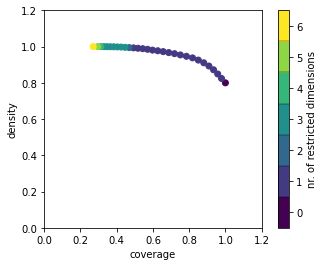

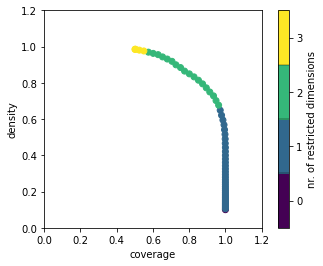

Deventer


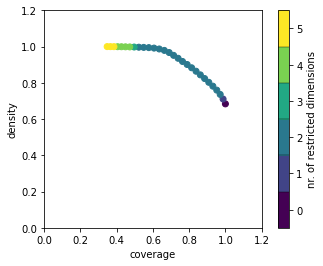

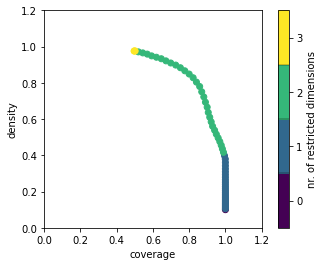

Gorssel


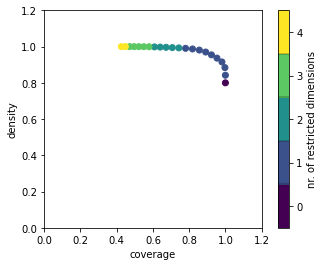

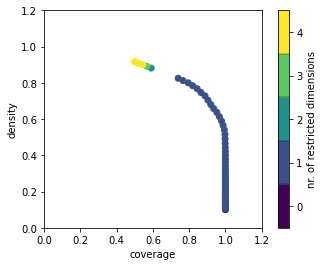

In [72]:
for actor, q in boxes.items():
    print(actor)
    for key, box in q.items():
        box.show_tradeoff()
        plt.show()

# Trying around to find the right box

## Overijssel

coverage    0.978625
density     0.824105
id                 1
mass            0.95
mean        0.824105
res_dim            1
Name: 1, dtype: object

              box 1                                         
                min       max                      qp values
A.5_pfail  0.000019  0.950001  [-1.0, 7.046661593993924e-41]



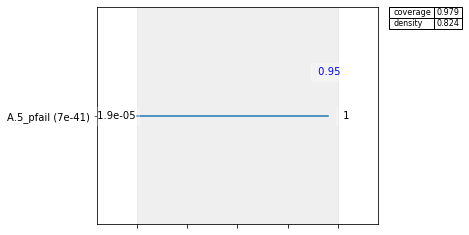

In [92]:
box_id=1
BOX = percentiles[0]
boxes["Overijssel"][BOX].inspect(box_id)
boxes["Overijssel"][BOX].inspect(box_id, style='graph')
plt.show()

In [93]:
lims = boxes["Overijssel"][BOX].box_lims[box_id]
limits = pd.DataFrame(data={"outcome": ["Overijssel A.5_pfail" + str(BOX)], "y": [0], "min": [lims["A.4_pfail"][0]], "max" :  [lims["A.4_pfail"][1]]})

coverage      0.8512
density     0.814545
id                44
mass          0.1045
mean        0.814545
res_dim            2
Name: 44, dtype: object

             box 44                                          
                min       max                       qp values
A.5_pfail  0.000019  0.115677                     [-1.0, 0.0]
A.4_pfail  0.098869  0.999986  [1.5503341633259234e-19, -1.0]



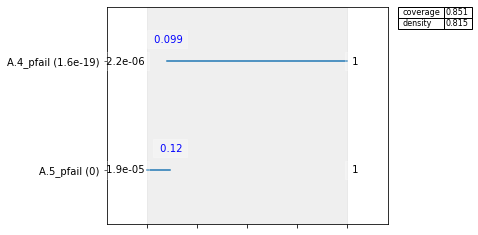

In [94]:
box_id=44
BOX = percentiles[1]
boxes["Overijssel"][BOX].inspect(box_id)
boxes["Overijssel"][BOX].inspect(box_id, style='graph')
plt.show()

In [95]:
lims = boxes["Overijssel"][BOX].box_lims[box_id]
limits = pd.concat([limits, pd.DataFrame(data={"outcome": ["Overijssel A.4_pfail" + str(BOX)], "y": [0], "min": [lims["A.4_pfail"][0]], "max" :  [lims["A.4_pfail"][1]]})], axis=0)
limits = pd.concat([limits, pd.DataFrame(data={"outcome": ["Overijssel A.5_pfail" + str(BOX)], "y": [0], "min": [lims["A.5_pfail"][0]], "max" :  [lims["A.5_pfail"][1]]})], axis=0)

In [96]:
limits

,outcome,y,min,max
0,Overijssel A.5_pfail20,0,0.000002,0.999986
0,Overijssel A.4_pfail90,0,0.098869,0.999986
0,Overijssel A.5_pfail90,0,0.000019,0.115677


# Now just do above for all other actors

## Deaths

In [77]:
box_id=1
BOX = DEATHS

coverage         1.0
density     0.841874
id                 1
mass            0.95
mean        0.841874
res_dim            1
Name: 1, dtype: object

              box 1                                          
                min       max                       qp values
A.4_pfail  0.000014  0.950001  [-1.0, 2.476817542206021e-123]



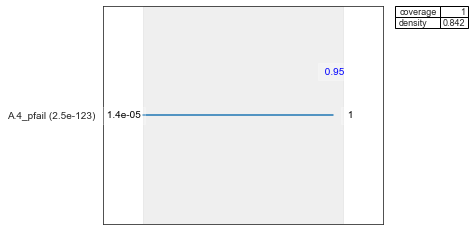

In [78]:
boxes[percentiles[0]][BOX].inspect(box_id)
boxes[percentiles[0]][BOX].inspect(box_id, style='graph')
plt.show()

In [79]:
lims = boxes[percentiles[0]][BOX].box_lims[box_id]

In [80]:
limits = pd.concat([limits, pd.DataFrame(data={"outcome": ["deaths 90"], "y": [1], "min": [lims["A.4_pfail"][0]], "max" :  [lims["A.4_pfail"][1]]})], axis=0)

In [81]:
box_id=41
BOX = DEATHS

coverage    0.972367
density     0.796588
id                41
mass         0.12192
mean        0.796588
res_dim            1
Name: 41, dtype: object

             box 41                       
                min       max    qp values
A.4_pfail  0.000014  0.121914  [-1.0, 0.0]



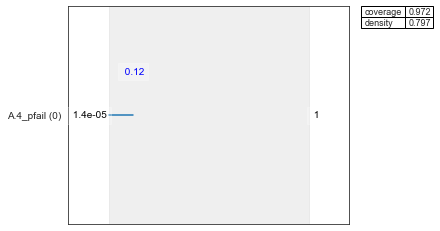

In [82]:
boxes[percentiles[1]][BOX].inspect(box_id)
boxes[percentiles[1]][BOX].inspect(box_id, style='graph')
plt.show()

In [85]:
lims = boxes[percentiles[1]][BOX].box_lims[box_id]

In [86]:
limits = pd.concat([limits, pd.DataFrame(data={"outcome": ["deaths 90"], "y":[1], "min": [lims["A.4_pfail"][0]], "max" :  [lims["A.4_pfail"][1]]})], axis=0)

# Visualisation

In [87]:
limits =limits.reset_index(drop=True)

In [88]:
limits

,outcome,y,min,max
0,damage 90,0,0.000014,0.950001
1,damage 10,0,0.000014,0.099266
2,deaths 90,1,0.000014,0.950001
3,deaths 90,1,0.000014,0.121914


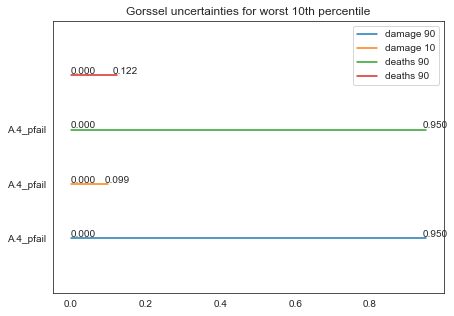

In [89]:
fig = plt.figure(figsize=[7,5])
ax = fig.add_subplot(111)
for index in limits.index:
    plt.plot([limits.loc[index]["min"],limits.loc[index]["max"]], [index,index])
    ax.annotate('{:.3f}'.format(limits.loc[index]["min"]),xy=(limits.loc[index]["min"],index +0.03))
    ax.annotate('{:.3f}'.format(limits.loc[index]["max"]),xy=(limits.loc[index]["max"]-0.01,index +0.03))
ax.grid(False)
ax.set_ylim([-1,4])
plt.legend(limits["outcome"].values)    
plt.yticks([0, 1,2], ["A.4_pfail"]*3)
plt.title("Gorssel uncertainties for worst 10th percentile")
plt.show()

In [35]:
gorssel_scen = pd.read_csv("simulation/optimisation/Gorssel/selected.csv")

In [39]:
A4_pfail = gorssel_scen["A.4_pfail"]

In [36]:
cases = get_cases(ACTORNAME)

{0: 'best',
 1: 'low',
 2: 'middle',
 3: 'high',
 4: 'worst deaths',
 5: 'absolute worst'}

0.8704588494473585
0.7499832047699677
0.4782696450522153
0.2860451612585706
0.0342204558160026
0.0352572124797946


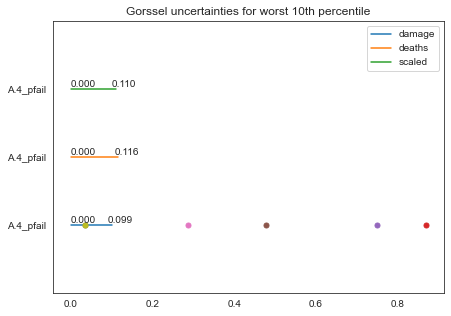

In [50]:
fig = plt.figure(figsize=[7,5])
ax = fig.add_subplot(111)
for index in limits.index:
    plt.plot([limits.loc[index]["min"],limits.loc[index]["max"]], [index,index])
    ax.annotate('{:.3f}'.format(limits.loc[index]["min"]),xy=(limits.loc[index]["min"],index +0.03))
    ax.annotate('{:.3f}'.format(limits.loc[index]["max"]),xy=(limits.loc[index]["max"]-0.01,index +0.03))

for pfail in A4_pfail:
    plt.plot(pfail, 0, markersize=5,  marker='o')
    print(pfail)
    
ax.grid(False)
ax.set_ylim([-1,3])
plt.legend(limits["outcome"].values)    
plt.yticks([0, 1,2], ["A.4_pfail"]*3)
plt.title("Gorssel uncertainties for worst 10th percentile")
plt.show()

#Gorssel probability of dike success